In [42]:
import numpy
from matplotlib import pyplot
%matplotlib inline

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression


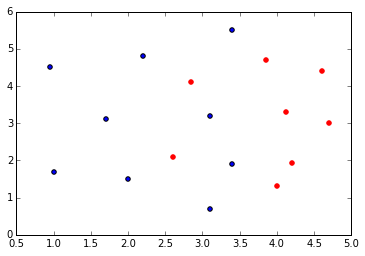

In [32]:
X_red = [[1, 1.7], [2, 1.5], [3.1, .7], [3.4, 1.9], [1.7, 3.1], [3.1, 3.2], [.95, 4.5], [2.2, 4.8], [3.4, 5.5]]
X_blue = [[4, 1.3], [4.2, 1.93], [2.6, 2.1], [4.12, 3.3], [4.7, 3], [2.85, 4.1], [3.86, 4.7], [4.6, 4.4]]
y_red = [0 for i in range(len(X_red))]
y_blue = [1 for i in range(len(X_blue))]
xr1, xr2 = zip(*X_red)
xb1, xb2 = zip(*X_blue)

pyplot.scatter(xr1, xr2)
pyplot.scatter(xb1, xb2, color='red')


In [33]:
X = X_blue + X_red
y = y_blue + y_red

In [64]:
print 'X---'
print X
print 'y---'
print y

X---
[[4, 1.3], [4.2, 1.93], [2.6, 2.1], [4.12, 3.3], [4.7, 3], [2.85, 4.1], [3.86, 4.7], [4.6, 4.4], [1, 1.7], [2, 1.5], [3.1, 0.7], [3.4, 1.9], [1.7, 3.1], [3.1, 3.2], [0.95, 4.5], [2.2, 4.8], [3.4, 5.5]]
y---
[1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [130]:
#let use sklearn with polynomial feature to separate this dataset
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)


In [131]:
print X_poly

[[   1.          4.          1.3        16.          5.2         1.69       64.
    20.8         6.76        2.197   ]
 [   1.          4.2         1.93       17.64        8.106       3.7249
    74.088      34.0452     15.64458     7.189057]
 [   1.          2.6         2.1         6.76        5.46        4.41
    17.576      14.196      11.466       9.261   ]
 [   1.          4.12        3.3        16.9744     13.596      10.89
    69.934528   56.01552    44.8668     35.937   ]
 [   1.          4.7         3.         22.09       14.1         9.
   103.823      66.27       42.3        27.      ]
 [   1.          2.85        4.1         8.1225     11.685      16.81
    23.149125   33.30225    47.9085     68.921   ]
 [   1.          3.86        4.7        14.8996     18.142      22.09
    57.512456   70.02812    85.2674    103.823   ]
 [   1.          4.6         4.4        21.16       20.24       19.36
    97.336      93.104      89.056      85.184   ]
 [   1.          1.          1.7  

In [132]:
clf = LogisticRegression(C=1)
clf.fit(X_poly, y)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [133]:
print clf.coef_

[[-0.29938286 -0.36172719 -0.17996326 -0.47591521  0.04174962  0.20880378
   0.18758671 -0.14511175  0.28634444 -0.16820185]]


In [134]:
#test x
clf.predict(poly.transform([[1, 1]]))[0]


0

In [135]:
#scan range [0, 5, 0, 6]
grid_red  = []
grid_blue = []
for i in range(5):
    for j in range(6):
        grid_poly = poly.transform([[i, j]])
        predicted = clf.predict(grid_poly)[0]
        if predicted == 0:
            grid_red += [[i, j]]
        else:
            grid_blue += [[i, j]]
            
    


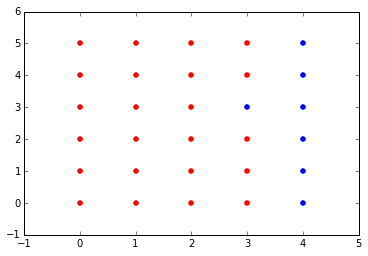

In [136]:
grid_redx, grid_redy = zip(*grid_red)
grid_bluex, grid_bluey = zip(*grid_blue)
pyplot.scatter(grid_redx, grid_redy, color='red')
pyplot.scatter(grid_bluex, grid_bluey, color='blue')


In [137]:
h = .02 #step size
X1 = numpy.array(X)
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = numpy.meshgrid(numpy.arange(x_min, x_max, h),
                     numpy.arange(y_min, y_max, h))

print '-----'
print xx.ravel()
print '-----'
print yy.ravel()

-----
[-0.05 -0.03 -0.01 ...,  5.65  5.67  5.69]
-----
[-0.3  -0.3  -0.3  ...,  6.48  6.48  6.48]


In [138]:
print numpy.c_[xx.ravel(), yy.ravel()]

[[-0.05 -0.3 ]
 [-0.03 -0.3 ]
 [-0.01 -0.3 ]
 ..., 
 [ 5.65  6.48]
 [ 5.67  6.48]
 [ 5.69  6.48]]


In [139]:
Z = clf.predict(poly.transform(numpy.c_[xx.ravel(), yy.ravel()]))

In [140]:
print Z

[0 0 0 ..., 1 1 1]


In [141]:
Z = Z.reshape(xx.shape)

<matplotlib.contour.QuadContourSet instance at 0x1177d5bd8>

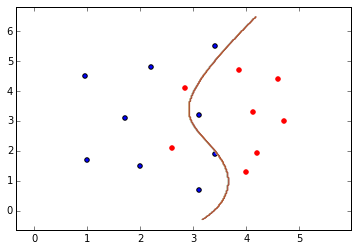

<matplotlib.contour.QuadContourSet instance at 0x117e0a680>

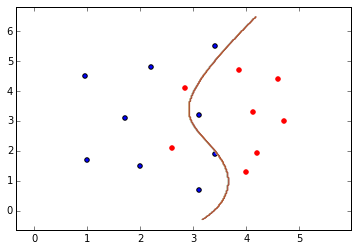

In [143]:
#for polynomial degree 3
pyplot.scatter(xr1, xr2)
pyplot.scatter(xb1, xb2, color='red')
pyplot.contour(xx, yy, Z, cmap=pyplot.cm.Paired)

<matplotlib.contour.QuadContourSet instance at 0x11410ed88>

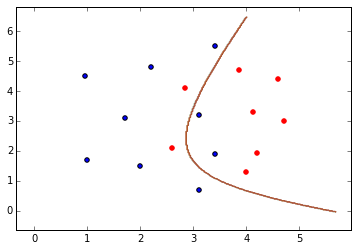

In [91]:
#for polynomial degree 2
pyplot.scatter(xr1, xr2)
pyplot.scatter(xb1, xb2, color='red')
pyplot.contour(xx, yy, Z, cmap=pyplot.cm.Paired)

<matplotlib.contour.QuadContourSet instance at 0x113924830>

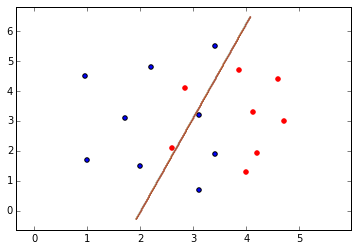

In [77]:
#for polynomial degree 1